In [1]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

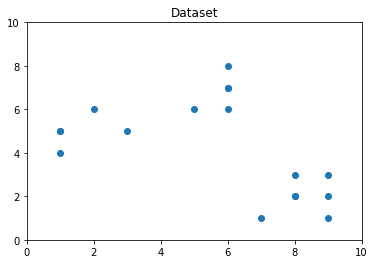

In [2]:
#Creating the data 
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8]) 
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3]) 
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2) 

#Visualizing the data 
plt.plot() 
plt.xlim([0, 10]) 
plt.ylim([0, 10]) 
plt.title('Dataset') 
plt.scatter(x1, x2) 
plt.show()


In [3]:
# Building the clustering model and calculating the values of the Distortion and Inertia
# Distortions means WCSS
# Inertia Means BCSS
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 

for k in K: 
	#Building and fitting the model 
	kmeanModel = KMeans(n_clusters=k).fit(X) 
	kmeanModel.fit(X)	 
	#calculating WCSS
	distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
					'euclidean'),axis=1)) / X.shape[0]) 
    #calculation BCSS
	inertias.append(kmeanModel.inertia_) 

	mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
				'euclidean'),axis=1)) / X.shape[0] 
	mapping2[k] = kmeanModel.inertia_ 

In [4]:
for key,val in mapping1.items(): 
	print(str(key)+' : '+str(val)) 

1 : 3.4577032384495707
2 : 1.7687413573405673
3 : 0.8819889697423957
4 : 0.7587138847606585
5 : 0.6635212812400347
6 : 0.5920126825722444
7 : 0.5093717077076823
8 : 0.42618267462691206
9 : 0.3333333333333333


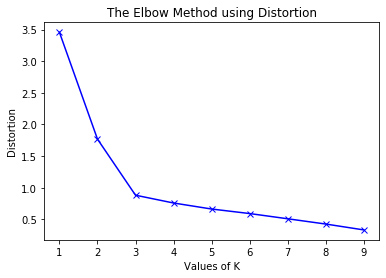

In [5]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

In [6]:
for key,val in mapping2.items(): 
	print(str(key)+' : '+str(val)) 

1 : 217.64705882352942
2 : 68.42857142857142
3 : 16.228571428571428
4 : 12.695238095238093
5 : 9.6
6 : 7.516666666666667
7 : 5.083333333333334
8 : 4.083333333333334
9 : 2.8333333333333335


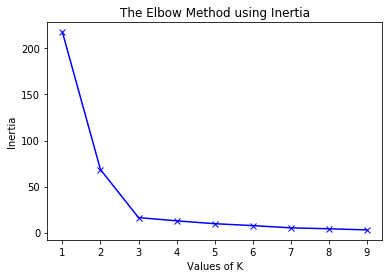

In [7]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [8]:
kmeanModel = KMeans(n_clusters=1).fit(X) 
kmeanModel.fit(X)
labels = kmeanModel.fit_predict(X)
centroids = kmeanModel.cluster_centers_
centroid_df = pd.DataFrame(centroids,columns=["X","Y"])
centroid_df

,X,Y
0,5.588235,4.294118


In [9]:
df = pd.DataFrame(X, columns=['x1', 'x2'])

In [10]:
df_new = pd.concat([df, pd.DataFrame({'labels':labels})], axis=1)

In [11]:
df_new.head()

,x1,x2,labels
0,3,5,0
1,1,4,0
2,1,5,0
3,2,6,0
4,1,5,0


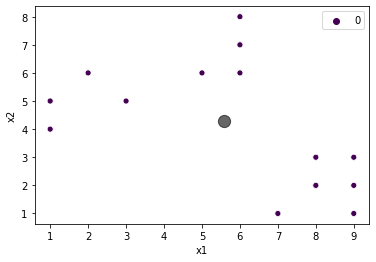

In [12]:
sns.scatterplot(x=df_new["x1"],y=df_new["x2"],hue=labels,palette="viridis")
plt.scatter(centroid_df["X"],centroid_df["Y"], c='black',s=150, alpha=0.6);
plt.show()

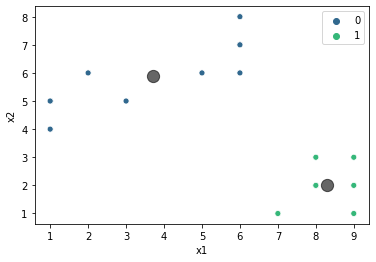

In [13]:
kmeanModel = KMeans(n_clusters=2).fit(X) 
kmeanModel.fit(X)
labels = kmeanModel.fit_predict(X)
centroids = kmeanModel.cluster_centers_
centroid_df = pd.DataFrame(centroids,columns=["X","Y"])
df = pd.DataFrame(X, columns=['x1', 'x2'])
df_new = pd.concat([df, pd.DataFrame({'labels':labels})], axis=1)


sns.scatterplot(x=df_new["x1"],y=df_new["x2"],hue=labels,palette="viridis")
plt.scatter(centroid_df["X"],centroid_df["Y"], c='black',s=150, alpha=0.6);
plt.show()

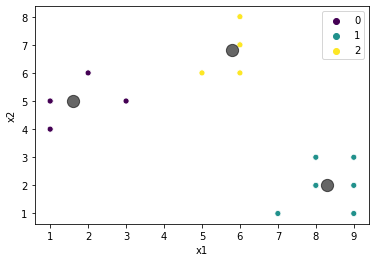

In [14]:
kmeanModel = KMeans(n_clusters=3).fit(X) 
kmeanModel.fit(X)
labels = kmeanModel.fit_predict(X)
centroids = kmeanModel.cluster_centers_
centroid_df = pd.DataFrame(centroids,columns=["X","Y"])
df = pd.DataFrame(X, columns=['x1', 'x2'])
df_new = pd.concat([df, pd.DataFrame({'labels':labels})], axis=1)


sns.scatterplot(x=df_new["x1"],y=df_new["x2"],hue=labels,palette="viridis")
plt.scatter(centroid_df["X"],centroid_df["Y"], c='black',s=150, alpha=0.6);
plt.show()